
# Data Cleaning, Data Preprocessing, EDA

In [62]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [28]:
# #Importing  files
df_test=pd.read_csv('https://www.dropbox.com/scl/fi/k3nxi8yh0pj5uewmnqihy/fraud_Test.csv?rlkey=syq7whlu2im1wosxins25opgt&dl=1')
df_test["Split"]="Test"

df_train=pd.read_csv("https://www.dropbox.com/scl/fi/xf2e4gupvr7b2pa3wm9eu/fraud_Train.csv?rlkey=jydnzf9guigkqbnsgkr6g9t0j&dl=1")
df_train["Split"]="Test"

df_all=pd.concat([df_test,df_train]).reset_index()

## Data Cleaning

- Since this is simulated data the dataset is cleaner than real life data. 
- There are no missing values in either train or test set
- Handling outliers is postponed after checking the exploratory data analysis. This as it is expected for the dataset to be imbalanced at least in terms of the target feature

## Data Preprocessing

In [72]:
# Change some string features to float/int.

df_all["gender_is_fem"]=np.where(df_all["gender"]=='F',1,0)

enc = preprocessing.OneHotEncoder()
encoded_data = enc.fit_transform(df_all[["category"]]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(["category"]))
df_all = pd.concat([df_all, encoded_df], axis=1)

# Change Date format and split date into just month, day and year
df_all["trans_date_trans_time"]=pd.to_datetime(df_all["trans_date_trans_time"])


In [73]:
df_all.head()

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## EDA

In [33]:
df_all.groupby(["is_fraud"]).agg({"cc_num":"count"})
# only 9k from 1.8m transactions are fraud

,cc_num
is_fraud,
0,1842743
1,9651


In [35]:
df_all.groupby(["is_fraud","gender"]).agg({"cc_num":"count"})
# there is a similar number of fraud cases by gender

cc_num
is_fraud gender         
0        F       1009850
         M        832893
1        F          4899
         M          4752

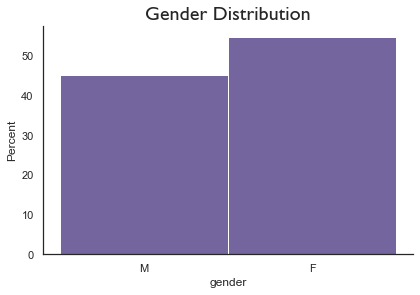

In [56]:
sns.set( style = "white" ) 
sns.set_palette("viridis")
sns.displot(data=df_all,x="gender", kind="hist", height=4, aspect=1.5,stat="percent")
plt.title('Gender Distribution', fontdict={'fontsize': 20,'fontname':"Gill Sans MT"})
plt.show()

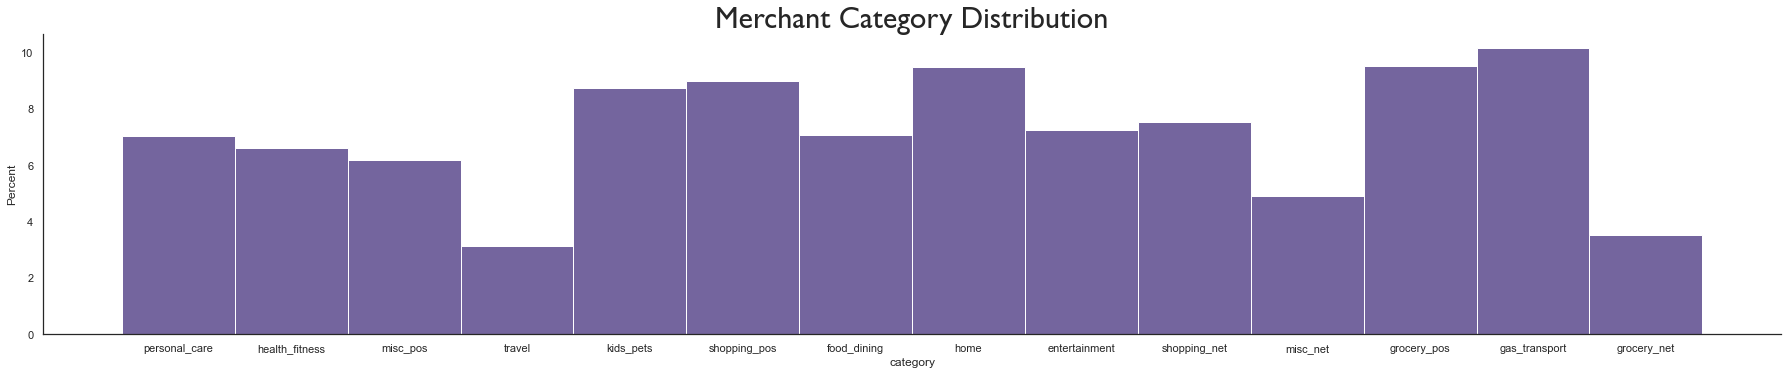

In [59]:
sns.displot(data=df_all,x="category", kind="hist", height=5, aspect=5,stat="percent")
plt.title('Merchant Category Distribution', fontdict={'fontsize': 30,'fontname':"Gill Sans MT"})
plt.show()

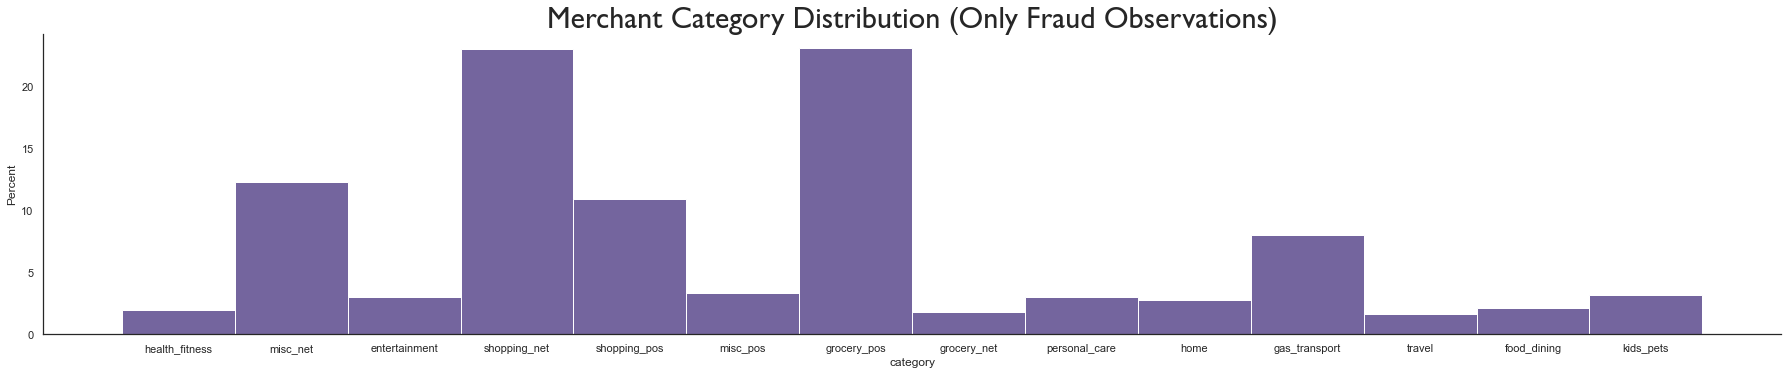

In [75]:
sns.displot(data=df_all[df_all["is_fraud"]==1],x="category", kind="hist", height=5, aspect=5,stat="percent")
plt.title('Merchant Category Distribution (Only Fraud Observations)', fontdict={'fontsize': 30,'fontname':"Gill Sans MT"})
plt.show()

In [32]:
df_test[df_test.columns[:15]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu